In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
target = "flag_transaksi_fraud"
id = "X"

In [3]:
train = pd.read_csv("fraud_train.csv")
test = pd.read_csv("fraud_test.csv")

In [4]:
print(train.shape)
print(test.shape)

(13125, 28)
(1875, 27)


In [5]:
train.describe()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.000000,1.312500e+04,1.312500e+04,13125.000000,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,1.312500e+04,...,13125.000000,13125.000000,13125.000000,13125.0,13125.0,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,7507.821943,2.457490e+06,2.457541e+06,85.340114,39300.900876,1678.483886,1.649037e+06,178.778362,10.729524,1.315219e+06,...,1.932267,1.404267,8.237410,3.0,999.0,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,4326.959832,1.047995e+02,1.088401e+02,40.921347,124187.745686,361.236161,9.914309e+05,142.504458,3.891783,2.838050e+06,...,0.251297,1.013583,1.721997,0.0,0.0,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,...,1.000000,1.000000,3.000000,3.0,999.0,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3784.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,...,2.000000,1.000000,9.000000,3.0,999.0,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7475.000000,2.457500e+06,2.457543e+06,103.000000,-2.000000,1798.000000,1.836319e+06,156.000000,10.000000,5.700000e+05,...,2.000000,1.000000,9.000000,3.0,999.0,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,11265.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.419350e+06,301.000000,11.000000,1.250000e+06,...,2.000000,1.000000,9.000000,3.0,999.0,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,...,2.000000,5.000000,9.000000,3.0,999.0,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


In [6]:
if target is None:
    target = list(set(train.columns) - set(test.columns))[0]
print(target)

flag_transaksi_fraud


In [7]:
train[target].unique()

array([0, 1], dtype=int64)

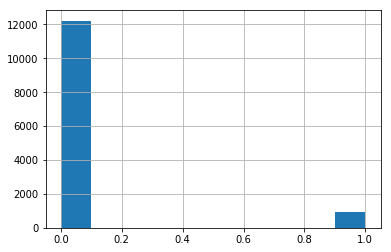

In [8]:
train[target].hist()

In [9]:
print("target: {}\n".format(str(target)))
for unique in train[target].unique():
    print(str(unique) + ":\t" + str(train[train[target] == unique].count()[target]))

target: flag_transaksi_fraud

0:	12215
1:	910


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X,13125.0,7.507822e+03,4.326960e+03,1.0,3.784000e+03,7475.000,1.126500e+04,1.500000e+04
id_tanggal_transaksi_awal,13125.0,2.457490e+06,1.047995e+02,2457297.0,2.457404e+06,2457500.000,2.457581e+06,2.457662e+06
tanggal_transaksi_awal,13125.0,2.457541e+06,1.088401e+02,2457303.0,2.457451e+06,2457543.000,2.457632e+06,2.457754e+06
tipe_kartu,13125.0,8.534011e+01,4.092135e+01,0.0,9.300000e+01,103.000,1.110000e+02,1.380000e+02
id_merchant,13125.0,3.930090e+04,1.241877e+05,-2.0,-2.000000e+00,-2.000,-2.000000e+00,7.209900e+05
nama_merchant,13125.0,1.678484e+03,3.612362e+02,2.0,1.798000e+03,1798.000,1.798000e+03,1.859000e+03
tipe_mesin,13125.0,1.649037e+06,9.914309e+05,-4.0,1.130699e+06,1836319.000,2.419350e+06,6.928943e+06
tipe_transaksi,13125.0,1.787784e+02,1.425045e+02,26.0,2.600000e+01,156.000,3.010000e+02,6.400000e+02
nama_transaksi,13125.0,1.072952e+01,3.891783e+00,1.0,9.000000e+00,10.000,1.100000e+01,2.000000e+01
nilai_transaksi,13125.0,1.315219e+06,2.838050e+06,1.0,2.000000e+05,570000.000,1.250000e+06,7.500000e+07


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
X,1875.0,7.459226e+03,4.317990e+03,1.800000e+01,3.784500e+03,7355.000,1.123100e+04,1.499600e+04
id_tanggal_transaksi_awal,1875.0,2.457495e+06,1.052403e+02,2.457297e+06,2.457407e+06,2457507.000,2.457592e+06,2.457662e+06
tanggal_transaksi_awal,1875.0,2.457547e+06,1.089200e+02,2.457302e+06,2.457456e+06,2457554.000,2.457640e+06,2.457754e+06
tipe_kartu,1875.0,8.815733e+01,3.860457e+01,0.000000e+00,9.300000e+01,104.000,1.110000e+02,1.380000e+02
id_merchant,1875.0,4.016102e+04,1.235823e+05,-2.000000e+00,-2.000000e+00,-2.000,-2.000000e+00,6.994290e+05
nama_merchant,1875.0,1.666363e+03,3.770087e+02,1.000000e+00,1.798000e+03,1798.000,1.798000e+03,1.857000e+03
tipe_mesin,1875.0,1.646143e+06,9.966716e+05,-4.000000e+00,1.092712e+06,1842854.000,2.432934e+06,6.923365e+06
tipe_transaksi,1875.0,1.810288e+02,1.411107e+02,2.600000e+01,2.600000e+01,156.000,3.010000e+02,6.400000e+02
nama_transaksi,1875.0,1.072480e+01,3.974304e+00,1.000000e+00,9.000000e+00,10.000,1.100000e+01,1.900000e+01
nilai_transaksi,1875.0,1.275767e+06,2.695525e+06,9.500000e+03,2.000000e+05,580000.000,1.250000e+06,6.417800e+07


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [18]:
train_null = train[pd.isnull(train).any(axis=1)]
train_null[train_null[target] ==0]

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
3781,12852,2457368,2457412,111,-2,1798,2337114,148,5,25000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,0
6501,7518,2457620,2457697,111,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,NaN,NaN,NaN,NaN,0
7693,9090,2457504,2457528,111,-2,1798,2162037,159,19,101613.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,0
7777,4192,2457331,2457373,111,-2,1798,1906758,159,19,25000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,0
11142,6907,2457308,2457348,103,-2,1798,1478519,385,11,100000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,0


In [19]:
train_null[train_null[target] ==1]

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
610,1039,2457561,2457607,93,-2,1798,-3,156,12,100000.0,...,5,8,False,3,999,NaN,NaN,NaN,NaN,1
1489,4020,2457655,2457658,103,-2,1798,2330,147,3,1000000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
1829,14080,2457510,2457521,93,-2,1798,185678,159,19,6000000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
3069,1335,2457514,2457573,111,-2,1798,2344943,26,10,500000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
3752,8871,2457531,2457610,111,-2,1798,2805857,26,10,2500000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
6185,8659,2457603,2457643,93,-2,1798,288963,26,10,600000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
7655,2557,2457558,2457566,93,-2,1798,3186008,238,9,2150000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
7660,1813,2457385,2457463,111,-2,1798,2393471,26,10,200000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
8719,2465,2457592,2457645,111,-2,1798,2331560,26,10,400000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1
8758,9504,2457524,2457525,111,-2,1798,181,147,3,500000.0,...,1,9,False,3,999,NaN,NaN,NaN,NaN,1


In [20]:
print("train only one value:\n")
for col in train.columns:
    if len(train[col].unique()) < 2:
        print(col)

train only one value:

flag_transaksi_finansial
status_transaksi
bank_pemilik_kartu


In [21]:
print("test only one value:\n")
for col in test.columns:
    if len(test[col].unique()) < 2:
        print(col)

test only one value:

flag_transaksi_finansial
status_transaksi
bank_pemilik_kartu


In [26]:
train.head(5).T

,0,1,2,3,4
X,4676,788,1520,9346,2914
id_tanggal_transaksi_awal,2457646,2457419,2457521,2457659,2457311
tanggal_transaksi_awal,2457726,2457507,2457612,2457746,2457385
tipe_kartu,111,111,2,103,0
id_merchant,-2,-2,-2,75336,-2
nama_merchant,1798,1798,1798,249,1798
tipe_mesin,2605127,-3,-3,2806174,2334932
tipe_transaksi,26,156,156,58,26
nama_transaksi,10,12,12,6,10
nilai_transaksi,2.2e+06,2.5e+06,1.2e+06,320000,150000


In [29]:
for col in train.columns:
    print("{}: {}".format(col, len(train[col].unique())))
    
cat = [
    "tipe_kartu",
    "id_merchant",
    "nama_merchant",
    "tipe_mesin",
    "tipe_transaksi",
    "nama_negara",
    "nama_kota",
    "lokasi_mesin",
    "pemilik_mesin",
    "kepemilikan_kartu",
    "nama_channel",
    "id_channel"
]

useless = ["flag_transaksi_finansial", "status_finansial", "bank_pemilik_kartu"]

red = [("nama_transaksi", "tipe_transaksi"), ("id_negara", "nama_negara")]

print("\n-----------------------------------------------\n")

added = 0
for c in cat:
    jumlah_cat = len(train[c].unique())
    print("{}: {}".format(c, jumlah_cat))
    added += jumlah_cat
print(added)

X: 8793
id_tanggal_transaksi_awal: 360
tanggal_transaksi_awal: 452
tipe_kartu: 14
id_merchant: 1122
nama_merchant: 1105
tipe_mesin: 5341
tipe_transaksi: 20
nama_transaksi: 20
nilai_transaksi: 1425
id_negara: 13
nama_negara: 12
nama_kota: 229
lokasi_mesin: 5814
pemilik_mesin: 1666
waktu_transaksi: 7952
kuartal_transaksi: 4
kepemilikan_kartu: 2
nama_channel: 5
id_channel: 4
flag_transaksi_finansial: 1
status_transaksi: 1
bank_pemilik_kartu: 1
rata_rata_nilai_transaksi: 3091
maksimum_nilai_transaksi: 805
minimum_nilai_transaksi: 755
rata_rata_jumlah_transaksi: 372
flag_transaksi_fraud: 2

-----------------------------------------------

tipe_kartu: 14
id_merchant: 1122
nama_merchant: 1105
tipe_mesin: 5341
tipe_transaksi: 20
nama_negara: 12
nama_kota: 229
lokasi_mesin: 5814
pemilik_mesin: 1666
kepemilikan_kartu: 2
nama_channel: 5
id_channel: 4
15334


In [30]:
print(train.shape)

(13125, 28)


In [35]:
for col in cat:
    print("\n" + col)
    print("\t0: {}".format(len(set(train[train[target] == 0][col].unique()))))
    print("\t1: {}".format(len(set(train[train[target] == 1][col].unique()))))


tipe_kartu
	0: 14
	1: 12

id_merchant
	0: 1100
	1: 52

nama_merchant
	0: 1089
	1: 54

tipe_mesin
	0: 5234
	1: 515

tipe_transaksi
	0: 20
	1: 16

nama_negara
	0: 12
	1: 5

nama_kota
	0: 208
	1: 127

lokasi_mesin
	0: 5566
	1: 784

pemilik_mesin
	0: 1498
	1: 325

kepemilikan_kartu
	0: 2
	1: 2

nama_channel
	0: 5
	1: 4

id_channel
	0: 4
	1: 3


In [36]:
def custom_one_hot_encoder(df, test_df, target, cat=[]):

    for col in cat:
        target_0 = set(df[df[target] == 0][col].unique())
        target_1 = set(df[df[target] == 1][col].unique())
        targeted = target_1
        
        if len(target_0) < len(target_1):
            targeted = target_0
            
        for t in targeted:
            df[col + '_{}'.format(t)] = 0
            test_df[col + '_{}'.format(t)] = 0
    
        for i, row in df.iterrows():
            if row[col] in targeted:
                df.set_value(i,col + '_{}'.format(row[col]),1)

        for i, row in test_df.iterrows():
            if row[col] in targeted:
                test_df.set_value(i,col + '_{}'.format(row[col]),1)
    
    return df, test_df